# هدف : تشخیص پلاک و مخدوش کردن آن

# وارد کردن کتابخانه های لازم

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

# بارگذاری عکس

In [2]:
img = cv2.imread('Data/car_plate_russia.jpg')

# تعریف تابع برای نمایش عکس به ابعاد دلخواه

In [3]:
# Define the display function
def display(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

# نمایش عکس 

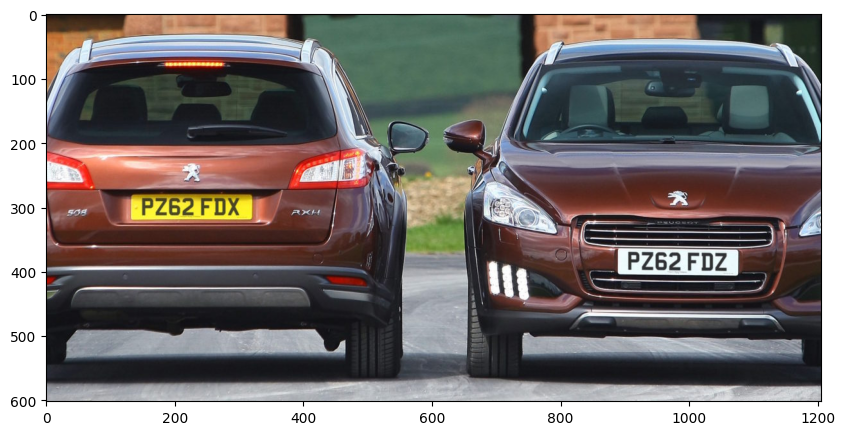

In [4]:
display(img)

# hardcascale_russian_plate_number.xml file بارگذاری فایل 

In [5]:
plate_cascade = cv2.CascadeClassifier('Data/haarcascade/haarcascade_russian_plate_number.xml')

# Ensure plate_cascade is defined correctly, replace with the correct classifier
# plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')

# تعریف تابع برای تشخیص پلاک

In [6]:
# Define the detect_plate function
def detect_plate(img):
    plate_img = img.copy()
    
    plate_rects = plate_cascade.detectMultiScale(plate_img, scaleFactor=1.3, minNeighbors=3)
    
    for (x, y, w, h) in plate_rects:
        cv2.rectangle(plate_img, (x, y), (x + w, y + h), (0, 0, 255), 4)
        
    return plate_img


# scaleFactor : این پارامتر میزان تغییر اندازه تصویر را در هر مرحله برای شناسایی صورت‌ها مشخص می‌کند
# scaleFactor بیشتر از 1 باشد، تصویر در هر مرحله بزرگ‌تر می‌شود
# scaleFactor کمتر از 1 باشد، تصویر در هر مرحله کوچک‌تر می‌شود

# مقدار 1.3 به این معنی است که تصویر در هر مرحله به اندازه 30٪ بزرگ تر می‌شود تا صورت‌ها در مقیاس‌های مختلف شناسایی شوند
# مقادیر بزرگتر باعث کاهش دقت شناسایی و مقادیر کوچکتر ممکن است منجر به افزایش زمان پردازش شوند

# minNeighbors: تعداد حداقل همسایگان (یا اطرافیان) که برای شناسایی یک منطقه به عنوان صورت باید وجود داشته باشند
# مقدار پیش‌فرض آن 3 است

# ذخیره نتیجه

In [7]:
result = detect_plate(img)

# (تشخیص پلاک) نمایش نتیجه 

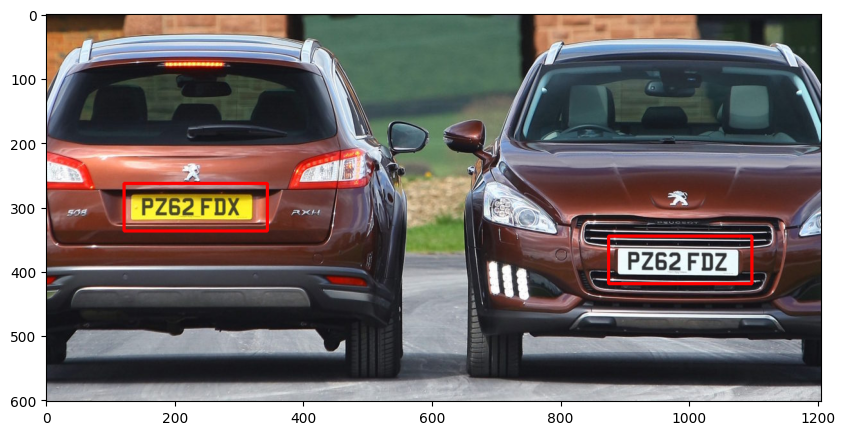

In [8]:
display(result)

# تعریف تابع برای مخدوش کردن پلاک 

In [9]:
# Define the detect_and_blur_plate function

def detect_and_blur_plate(img):
    plate_img = img.copy()
    roi = img.copy()
    
    plate_rects = plate_cascade.detectMultiScale(plate_img, scaleFactor=1.3, minNeighbors=3)
    
    for (x, y, w, h) in plate_rects:

        roi = plate_img[y:y+h, x:x+w]
        blurred_roi = cv2.medianBlur(roi, 9)
        
        plate_img[y:y+h, x:x+w] = blurred_roi
    
    return plate_img

# ذخیره نتیحه

In [10]:
result = detect_and_blur_plate(img)

# نمایش نتیجه

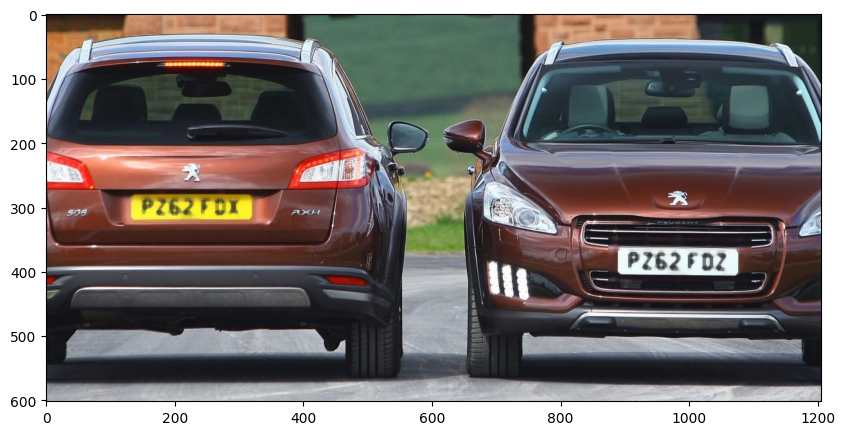

In [11]:
display(result)